# ĐỒ ÁN CUỐI KỲ MÔN LẬP TRÌNH CHO KHOA HỌC DỮ LIỆU

#### Họ và tên: Nguyễn Thành Đạt

#### MSSV: 1712331

---

## Nguồn lấy dữ liệu

 - Dữ liệu phục vụ cho đồ án lấy từ [kaggle](https://www.kaggle.com/tahminashoaib86/global-cause-of-the-deaths-other-than-diseases)
 
 - Dữ liệu được truy cập hoàn toàn miễn phí.
 
---
 
## Mô tả

 - Dữ liệu là một phần của dự án Global Disease Burden 2017.

 - Dữ liệu bao gồm số lượng người chết trong mỗi nước qua các năm cùng với các nguyên nhân được phân loại gồm: xung đột và khủng bố (conflict and terrorism), nạn đói (famine), đại dịch (pandemic), thảm họa tự nhiên (natural disaster) và các nguyên nhân khác (Other injuries).
 
 - Không tính số lượng thương vong xảy ra do bệnh tật.

---


## Import thư viện

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

Chỉnh lại option trong pandas

In [2]:
pd.set_option('display.float_format', lambda x: '%.6f' % x)
pd.set_option('max_rows', 15)

---

## Khám phá dữ liệu

#### Load dữ liệu

In [3]:
df = pd.read_csv('Caused_of_Deaths.csv', engine='python')
df.head()

,Country,ISO_CODE,Year,Deaths,Cause,Male POP,Female POP,Total Pop,GDP,PCAP
0,Afghanistan,AFG,1980,35000,Conflict and Terrorism,6788279.000000,6568232.000000,13356511.000000,3641723321.995460,272.655286
1,Albania,ALB,1980,0,Conflict and Terrorism,1371795.000000,1300202.000000,2671997.000000,nan,nan
2,Algeria,DZA,1980,0,Conflict and Terrorism,9682121.000000,9539544.000000,19221665.000000,42345277342.019501,2202.997365
3,American Samoa,ASM,1980,0,Conflict and Terrorism,nan,nan,nan,nan,nan
4,Angola,AGO,1980,5882,Conflict and Terrorism,4226098.000000,4115191.000000,8341289.000000,5930503400.832280,710.981648


#### Tổng quan về dữ liệu

In [4]:
df.shape

(36860, 10)

Dữ liệu gồm:
 - 36860 dòng
 - 10 cột

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36860 entries, 0 to 36859
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Country     36860 non-null  object 
 1   ISO_CODE    36860 non-null  object 
 2   Year        36860 non-null  int64  
 3   Deaths      36860 non-null  int64  
 4   Cause       36860 non-null  object 
 5   Male POP    28156 non-null  float64
 6   Female POP  28156 non-null  float64
 7   Total Pop   28156 non-null  float64
 8   GDP         26332 non-null  float64
 9   PCAP        26320 non-null  float64
dtypes: float64(5), int64(2), object(3)
memory usage: 2.8+ MB


In [6]:
df.describe()

,Year,Deaths,Male POP,Female POP,Total Pop,GDP,PCAP
count,36860.000000,36860.000000,28156.000000,28156.000000,28156.000000,26332.000000,26320.000000
mean,1998.500000,247.950027,16153121.613581,15924580.358716,32077701.972297,223162649210.307312,8485.748803
std,10.966005,4080.560011,62539713.556245,59032922.135184,121556873.935689,1026739327541.277222,14017.964799
min,1980.000000,0.000000,29229.000000,30072.000000,59301.000000,31020000.000000,94.564731
25%,1989.000000,0.000000,1004304.000000,1015241.000000,2018122.000000,2606621255.015810,780.365369
50%,1998.500000,0.000000,3345875.000000,3350894.000000,6711121.000000,12302471429.431801,2474.231146
75%,2008.000000,3.000000,10119181.000000,10169092.000000,20246871.000000,78436578171.091400,9422.852726
max,2017.000000,503532.000000,711687182.000000,674707818.000000,1386395000.000000,19485393853000.000000,118823.648369


#### Mô tả về các cột dữ liệu
 
| Tên cột    | Mô tả                                                                                                                                                                                                          |
|:------------|:----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| Country    | Tên của các nước                                                                                                                                                                                               |
| ISO_CODE   | Mã hiệu mỗi quốc gia (3 ký tự)                                                                                                                                                                                 |
| Year       | Năm ghi nhận số liệu                                                                                                                                                                                           |
| Deaths     | Số lượng người tử vong                                                                                                                                                                                         |
| Cause      | Nguyên nhân tử vong (được phân loại theo: xung đột và khủng bố (conflict and terrorism), nạn đói (famine), đại dịch (pandemic), thảm họa tự nhiên (natural disaster) và các nguyên nhân khác (Other injuries)) |
| Male POP   | Dân số nam                                                                                                                                                                                                     |
| Female POP | Dân số nữ                                                                                                                                                                                                      |
| Total Pop  | Tổng dân số                                                                                                                                                                                                    |
| GDP        | Tổng sản phẩm quốc nội (tính theo USD)                                                                                                                                                                         |
| PCAP       | Thu nhập bình quân đầu người (tính theo USD)                                                                                                                                                                   |

#### Kiểm tra dữ liệu null theo cột


In [7]:
df[df['Male POP'].isnull()]

,Country,ISO_CODE,Year,Deaths,Cause,Male POP,Female POP,Total Pop,GDP,PCAP
3,American Samoa,ASM,1980,0,Conflict and Terrorism,nan,nan,nan,nan,nan
18,Bermuda,BMU,1980,0,Conflict and Terrorism,nan,nan,nan,613299968.000000,11218.217816
48,Dominica,DMA,1980,1,Conflict and Terrorism,nan,nan,nan,72804653.333333,966.681538
66,Greenland,GRL,1980,0,Conflict and Terrorism,nan,nan,nan,476055288.418886,9483.173076
107,Marshall Islands,MHL,1980,0,Conflict and Terrorism,nan,nan,nan,nan,nan
...,...,...,...,...,...,...,...,...,...,...
36732,Greenland,GRL,2017,0,Other Injuries,nan,nan,nan,2826651925.669020,50321.368754
36773,Marshall Islands,MHL,2017,0,Other Injuries,nan,nan,nan,212881000.000000,3666.695374
36791,Northern Mariana Islands,MNP,2017,0,Other Injuries,nan,nan,nan,1601000000.000000,28305.222588
36833,Taiwan,TWN,2017,32,Other Injuries,nan,nan,nan,nan,nan


In [8]:
df[df['Female POP'].isnull()]

,Country,ISO_CODE,Year,Deaths,Cause,Male POP,Female POP,Total Pop,GDP,PCAP
3,American Samoa,ASM,1980,0,Conflict and Terrorism,nan,nan,nan,nan,nan
18,Bermuda,BMU,1980,0,Conflict and Terrorism,nan,nan,nan,613299968.000000,11218.217816
48,Dominica,DMA,1980,1,Conflict and Terrorism,nan,nan,nan,72804653.333333,966.681538
66,Greenland,GRL,1980,0,Conflict and Terrorism,nan,nan,nan,476055288.418886,9483.173076
107,Marshall Islands,MHL,1980,0,Conflict and Terrorism,nan,nan,nan,nan,nan
...,...,...,...,...,...,...,...,...,...,...
36732,Greenland,GRL,2017,0,Other Injuries,nan,nan,nan,2826651925.669020,50321.368754
36773,Marshall Islands,MHL,2017,0,Other Injuries,nan,nan,nan,212881000.000000,3666.695374
36791,Northern Mariana Islands,MNP,2017,0,Other Injuries,nan,nan,nan,1601000000.000000,28305.222588
36833,Taiwan,TWN,2017,32,Other Injuries,nan,nan,nan,nan,nan


In [9]:
df[df['Total Pop'].isnull()]

,Country,ISO_CODE,Year,Deaths,Cause,Male POP,Female POP,Total Pop,GDP,PCAP
3,American Samoa,ASM,1980,0,Conflict and Terrorism,nan,nan,nan,nan,nan
18,Bermuda,BMU,1980,0,Conflict and Terrorism,nan,nan,nan,613299968.000000,11218.217816
48,Dominica,DMA,1980,1,Conflict and Terrorism,nan,nan,nan,72804653.333333,966.681538
66,Greenland,GRL,1980,0,Conflict and Terrorism,nan,nan,nan,476055288.418886,9483.173076
107,Marshall Islands,MHL,1980,0,Conflict and Terrorism,nan,nan,nan,nan,nan
...,...,...,...,...,...,...,...,...,...,...
36732,Greenland,GRL,2017,0,Other Injuries,nan,nan,nan,2826651925.669020,50321.368754
36773,Marshall Islands,MHL,2017,0,Other Injuries,nan,nan,nan,212881000.000000,3666.695374
36791,Northern Mariana Islands,MNP,2017,0,Other Injuries,nan,nan,nan,1601000000.000000,28305.222588
36833,Taiwan,TWN,2017,32,Other Injuries,nan,nan,nan,nan,nan


In [10]:
df[df['GDP'].isnull()]

,Country,ISO_CODE,Year,Deaths,Cause,Male POP,Female POP,Total Pop,GDP,PCAP
1,Albania,ALB,1980,0,Conflict and Terrorism,1371795.000000,1300202.000000,2671997.000000,nan,nan
3,American Samoa,ASM,1980,0,Conflict and Terrorism,nan,nan,nan,nan,nan
7,Armenia,ARM,1980,10,Conflict and Terrorism,1509206.000000,1590548.000000,3099754.000000,nan,nan
10,Azerbaijan,AZE,1980,0,Conflict and Terrorism,3016298.000000,3134435.000000,6150733.000000,nan,nan
14,Belarus,BLR,1980,0,Conflict and Terrorism,4483914.000000,5159086.000000,9643000.000000,nan,nan
...,...,...,...,...,...,...,...,...,...,...
36824,South Sudan,SSD,2017,0,Other Injuries,5459485.000000,5451274.000000,10910759.000000,nan,nan
36832,Syria,SYR,2017,0,Other Injuries,8578427.000000,8489575.000000,17068002.000000,nan,nan
36833,Taiwan,TWN,2017,32,Other Injuries,nan,nan,nan,nan,nan
36854,Venezuela,VEN,2017,0,Other Injuries,14547061.000000,14843348.000000,29390409.000000,nan,nan


In [11]:
df[df['PCAP'].isnull()]

,Country,ISO_CODE,Year,Deaths,Cause,Male POP,Female POP,Total Pop,GDP,PCAP
1,Albania,ALB,1980,0,Conflict and Terrorism,1371795.000000,1300202.000000,2671997.000000,nan,nan
3,American Samoa,ASM,1980,0,Conflict and Terrorism,nan,nan,nan,nan,nan
7,Armenia,ARM,1980,10,Conflict and Terrorism,1509206.000000,1590548.000000,3099754.000000,nan,nan
10,Azerbaijan,AZE,1980,0,Conflict and Terrorism,3016298.000000,3134435.000000,6150733.000000,nan,nan
14,Belarus,BLR,1980,0,Conflict and Terrorism,4483914.000000,5159086.000000,9643000.000000,nan,nan
...,...,...,...,...,...,...,...,...,...,...
36824,South Sudan,SSD,2017,0,Other Injuries,5459485.000000,5451274.000000,10910759.000000,nan,nan
36832,Syria,SYR,2017,0,Other Injuries,8578427.000000,8489575.000000,17068002.000000,nan,nan
36833,Taiwan,TWN,2017,32,Other Injuries,nan,nan,nan,nan,nan
36854,Venezuela,VEN,2017,0,Other Injuries,14547061.000000,14843348.000000,29390409.000000,nan,nan


Ta thấy:

 - Có 8704 dòng bị mất giá trị ở các cột 'Male POP', 'Female POP', 'Total Pop'
 
 - Có 10528 dòng bị mất giá trị ở cột 'GDP'
 
 - Có 10540 dòng bị mất giá trị ở cột 'PCAP'

---

## Tiền xử lý dữ liệu

#### Loại những cột không quan tâm đến

In [12]:
dropped_columns = ['ISO_CODE', 'Male POP', 'Female POP']

df = df.drop(columns=dropped_columns)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36860 entries, 0 to 36859
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Country    36860 non-null  object 
 1   Year       36860 non-null  int64  
 2   Deaths     36860 non-null  int64  
 3   Cause      36860 non-null  object 
 4   Total Pop  28156 non-null  float64
 5   GDP        26332 non-null  float64
 6   PCAP       26320 non-null  float64
dtypes: float64(3), int64(2), object(2)
memory usage: 2.0+ MB


#### Sắp xếp lại dữ liệu cho dễ xử lý

Xếp theo thứ tự các cột ['Country', 'Year', 'Total Pop', 'GDP', 'PCAP'] với giá trị null xếp lên đầu nếu có

In [13]:
df = df.sort_values(by=['Country', 'Year', 'Total Pop', 'GDP', 'PCAP'], na_position='first')
df

,Country,Year,Deaths,Cause,Total Pop,GDP,PCAP
7372,Afghanistan,1980,0,Epidemics,nan,nan,nan
0,Afghanistan,1980,35000,Conflict and Terrorism,13356511.000000,3641723321.995460,272.655286
14744,Afghanistan,1980,0,Famine,13356511.000000,3641723321.995460,272.655286
22116,Afghanistan,1980,0,Natural Disaster,13356511.000000,3641723321.995460,272.655286
29488,Afghanistan,1980,0,Other Injuries,13356511.000000,3641723321.995460,272.655286
...,...,...,...,...,...,...,...
14743,Zimbabwe,2017,0,Epidemics,nan,nan,nan
7371,Zimbabwe,2017,5,Conflict and Terrorism,14236745.000000,22040902300.000000,1548.170056
22115,Zimbabwe,2017,0,Famine,14236745.000000,22040902300.000000,1548.170056
29487,Zimbabwe,2017,0,Natural Disaster,14236745.000000,22040902300.000000,1548.170056


#### Xử lý dữ liệu null ở cột 'Total Pop'

Do dữ liệu đã được xếp lại cho các cột có giá trị null lên đầu theo từng năm nên ta có thể lấy dữ liệu dòng kế tiếp để điền vào

In [14]:
df["Total Pop"] = df["Total Pop"].fillna(method='bfill')
df

,Country,Year,Deaths,Cause,Total Pop,GDP,PCAP
7372,Afghanistan,1980,0,Epidemics,13356511.000000,nan,nan
0,Afghanistan,1980,35000,Conflict and Terrorism,13356511.000000,3641723321.995460,272.655286
14744,Afghanistan,1980,0,Famine,13356511.000000,3641723321.995460,272.655286
22116,Afghanistan,1980,0,Natural Disaster,13356511.000000,3641723321.995460,272.655286
29488,Afghanistan,1980,0,Other Injuries,13356511.000000,3641723321.995460,272.655286
...,...,...,...,...,...,...,...
14743,Zimbabwe,2017,0,Epidemics,14236745.000000,nan,nan
7371,Zimbabwe,2017,5,Conflict and Terrorism,14236745.000000,22040902300.000000,1548.170056
22115,Zimbabwe,2017,0,Famine,14236745.000000,22040902300.000000,1548.170056
29487,Zimbabwe,2017,0,Natural Disaster,14236745.000000,22040902300.000000,1548.170056


Kiểm tra lại cột 'Total Pop' còn dòng nào null không

In [15]:
df['Total Pop'].isnull().sum()

0

Tương tự cho 2 cột 'GDP', 'PCAP'

In [16]:
df["GDP"] = df["GDP"].fillna(method='bfill')
df["PCAP"] = df["PCAP"].fillna(method='bfill')
df

,Country,Year,Deaths,Cause,Total Pop,GDP,PCAP
7372,Afghanistan,1980,0,Epidemics,13356511.000000,3641723321.995460,272.655286
0,Afghanistan,1980,35000,Conflict and Terrorism,13356511.000000,3641723321.995460,272.655286
14744,Afghanistan,1980,0,Famine,13356511.000000,3641723321.995460,272.655286
22116,Afghanistan,1980,0,Natural Disaster,13356511.000000,3641723321.995460,272.655286
29488,Afghanistan,1980,0,Other Injuries,13356511.000000,3641723321.995460,272.655286
...,...,...,...,...,...,...,...
14743,Zimbabwe,2017,0,Epidemics,14236745.000000,22040902300.000000,1548.170056
7371,Zimbabwe,2017,5,Conflict and Terrorism,14236745.000000,22040902300.000000,1548.170056
22115,Zimbabwe,2017,0,Famine,14236745.000000,22040902300.000000,1548.170056
29487,Zimbabwe,2017,0,Natural Disaster,14236745.000000,22040902300.000000,1548.170056


Kiểm tra lại cột 'GDP' còn dòng nào null không

In [17]:
df['GDP'].isnull().sum()

0

Kiểm tra lại cột 'PCAP' còn dòng nào null không

In [18]:
df['PCAP'].isnull().sum()

0

#### Đổi kiểu dữ liệu cột 'Total Pop' từ float sang int

In [19]:
df['Total Pop'] = df['Total Pop'].astype(int)
df

,Country,Year,Deaths,Cause,Total Pop,GDP,PCAP
7372,Afghanistan,1980,0,Epidemics,13356511,3641723321.995460,272.655286
0,Afghanistan,1980,35000,Conflict and Terrorism,13356511,3641723321.995460,272.655286
14744,Afghanistan,1980,0,Famine,13356511,3641723321.995460,272.655286
22116,Afghanistan,1980,0,Natural Disaster,13356511,3641723321.995460,272.655286
29488,Afghanistan,1980,0,Other Injuries,13356511,3641723321.995460,272.655286
...,...,...,...,...,...,...,...
14743,Zimbabwe,2017,0,Epidemics,14236745,22040902300.000000,1548.170056
7371,Zimbabwe,2017,5,Conflict and Terrorism,14236745,22040902300.000000,1548.170056
22115,Zimbabwe,2017,0,Famine,14236745,22040902300.000000,1548.170056
29487,Zimbabwe,2017,0,Natural Disaster,14236745,22040902300.000000,1548.170056


#### Đánh lại giá trị index

Đánh lại giá trị index cho dễ nhìn

In [20]:
df = df.reset_index(drop=True)

df

,Country,Year,Deaths,Cause,Total Pop,GDP,PCAP
0,Afghanistan,1980,0,Epidemics,13356511,3641723321.995460,272.655286
1,Afghanistan,1980,35000,Conflict and Terrorism,13356511,3641723321.995460,272.655286
2,Afghanistan,1980,0,Famine,13356511,3641723321.995460,272.655286
3,Afghanistan,1980,0,Natural Disaster,13356511,3641723321.995460,272.655286
4,Afghanistan,1980,0,Other Injuries,13356511,3641723321.995460,272.655286
...,...,...,...,...,...,...,...
36855,Zimbabwe,2017,0,Epidemics,14236745,22040902300.000000,1548.170056
36856,Zimbabwe,2017,5,Conflict and Terrorism,14236745,22040902300.000000,1548.170056
36857,Zimbabwe,2017,0,Famine,14236745,22040902300.000000,1548.170056
36858,Zimbabwe,2017,0,Natural Disaster,14236745,22040902300.000000,1548.170056


---

## Sơ lược về dữ liệu

#### Số lượng thương vong theo các nước

In [21]:
grouped_deaths_by_country = df.groupby(['Country'])['Deaths'].sum().reset_index()
grouped_deaths_by_country = grouped_deaths_by_country.sort_values(by=['Deaths', 'Country'], ascending=False).reset_index(drop=True)
grouped_deaths_by_country

,Country,Deaths
0,Iraq,710772
1,Afghanistan,674536
2,North Korea,613567
3,Rwanda,530828
4,Ethiopia,481142
...,...,...
189,Kiribati,7
190,Marshall Islands,6
191,Barbados,5
192,Brunei,3


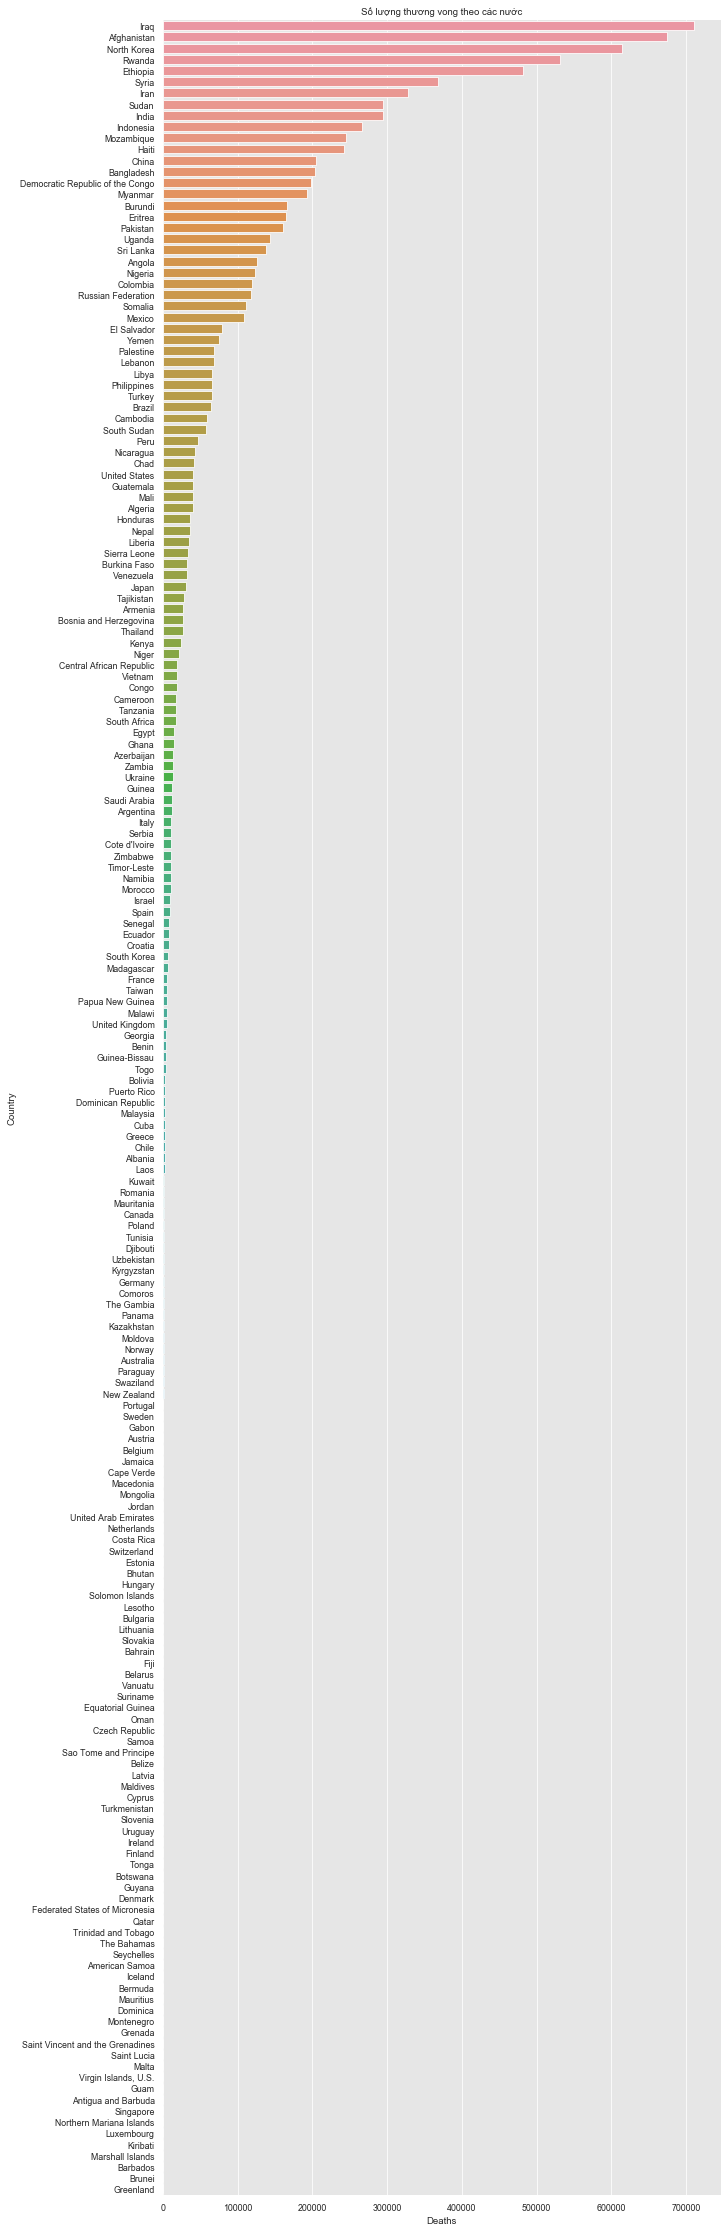

In [22]:
sns.set_style("darkgrid", {"axes.facecolor": ".9"})
sns.set_context("paper")

f, ax = plt.subplots(figsize=(10, 40))

sns.set_palette("Set1", 8, .85)

sns.barplot(
    x="Deaths",
    y="Country",
    data=grouped_deaths_by_country,
    label="Country").set(
    title='Số lượng thương vong theo các nước'
)

sns.despine(left=True, bottom=True)

#### Số lượng thương vong theo từng năm

In [23]:
grouped_deaths_by_year = df.groupby(['Year'])['Deaths'].sum().reset_index()
grouped_deaths_by_year

,Year,Deaths
0,1980,165930
1,1981,207165
2,1982,334539
3,1983,477920
4,1984,497521
...,...,...
33,2013,166201
34,2014,235609
35,2015,198728
36,2016,185504


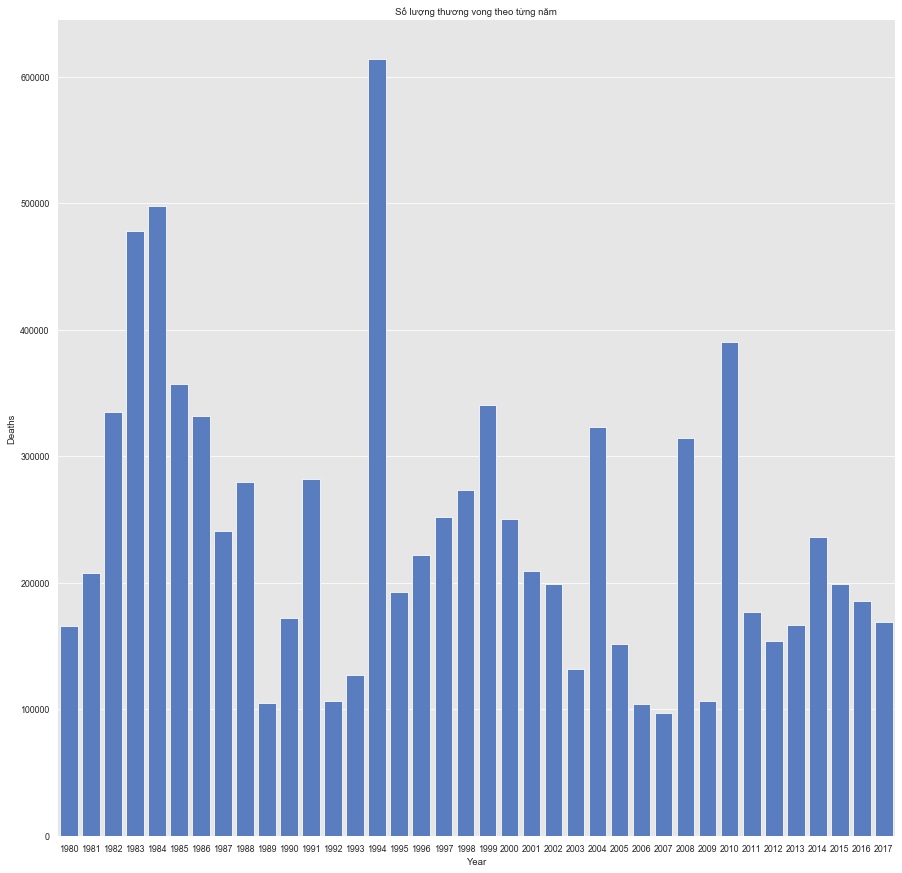

In [24]:
sns.set_style("darkgrid", {"axes.facecolor": ".9"})
sns.set_context("paper")

sns.set_color_codes("muted")
f, ax = plt.subplots(figsize=(15, 15))

sns.barplot(
    x="Year",
    y="Deaths",
    data=grouped_deaths_by_year,
    label="Year",
    color='b').set(
    title='Số lượng thương vong theo từng năm'
)

sns.despine(left=True, bottom=True)

#### Số lượng thương vong theo nguyên nhân

In [25]:
grouped_deaths_by_cause = df.groupby(['Cause'])['Deaths'].sum().reset_index()
grouped_deaths_by_cause = grouped_deaths_by_cause.sort_values(by=['Deaths', 'Cause'], ascending=False).reset_index(drop=True)
grouped_deaths_by_cause

,Cause,Deaths
0,Conflict and Terrorism,5172382
1,Natural Disaster,1612089
2,Famine,1191671
3,Other Injuries,732593
4,Epidemics,430703


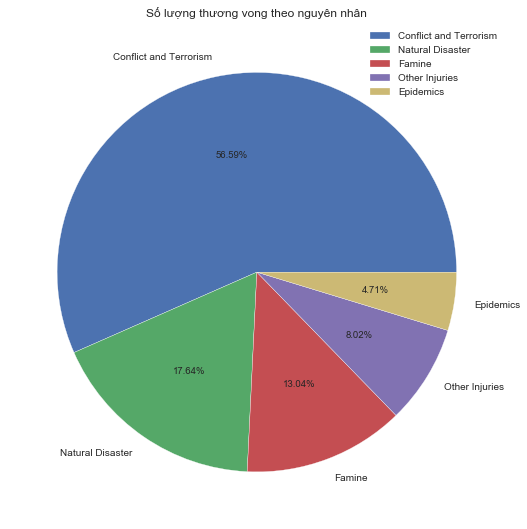

In [26]:
labels = grouped_deaths_by_cause['Cause'].unique()
rates = (grouped_deaths_by_cause['Deaths']/grouped_deaths_by_cause['Deaths'].sum())*100

plt.style.use('seaborn')

fig, ax = plt.subplots()
plt.title('Số lượng thương vong theo nguyên nhân')
plt.tight_layout()
fig.set_figheight(8)
fig.set_figwidth(8)

plt.pie(rates, labels=labels, radius=1, autopct='%0.2f%%')
plt.legend()

plt.show()

---

## Đặt câu hỏi

###### Sau khi có cái nhìn tổng quát về dữ liệu, ta thấy có một số vấn đề cần được quan tâm:

 - Câu 1: Sau khi sơ lược khái quát về dự liệu, ta thấy nạn xung đột và khủng bố chiếm số lượng thương vong cao nhất (vấn đề dáng quan tâm). Tìm top 10 nước có số lượng thương vong cao nhất do nạn xung đột và khủng bố gây ra.
 
 - Câu 2: Số lượng thương vong có gây ảnh hưởng đến chỉ số Total Pop, GDP, PCAP cảu các nước hay không?
 
 - Câu 3: Thống kê số liệu thương vong của Việt Nam trong dữ liệu trên. 
 
---

### Câu 1

In [27]:
top_10_highest_deaths_by_conflict_and_terrorism = df[df['Cause']=='Conflict and Terrorism'] \
                                                    .reset_index() \
                                                    .groupby(['Country'])['Deaths'].sum() \
                                                    .reset_index() \
                                                    .sort_values(by=['Deaths', 'Country'], ascending=False) \
                                                    .reset_index(drop=True) \
                                                    .head(10)

top_10_highest_deaths_by_conflict_and_terrorism

,Country,Deaths
0,Iraq,705170
1,Afghanistan,651211
2,Rwanda,528547
3,Syria,365076
4,Iran,241982
5,Eritrea,163908
6,Ethiopia,163723
7,Burundi,162803
8,Democratic Republic of the Congo,138958
9,Mozambique,132561


###### Nhận xét:

 - Ta thấy trong top 10 nước có lượng thương vọng cao nhất do nạn xung đột và khủng bố thì có 4 nước thuộc khu vực Trung Đông (Iraq, Afghanistan, Syria, Iran). Cho thấy đây là nơi vô cùng bất ổn về mặt chính trị. Đây cũng là nơi có trữ lượng dầu rất lớn, tín ngưỡng tôn giáo phức tạp, có những căng thẳng đáng kể giữa khu vực này và các vùng bên ngoài - đặc biệt là với các nước phương Tây. Có thể đây là nguyên nhân dẫn đến xung đột và khủng bố thường xuyên ở khu vực này.
 
 - 6 nước còn lại trong top 10 thuộc khu vực Châu Phi (Rwanda, Eritrea, Ethiopia, Burundi, Democratic Republic of the Congo, Mozambique). Đây là châu lục có nền kinh tế phát triển chậm, xung đột chủ yếu trong nội bộ các quốc gia, không có khả năng đảm bảo luật pháp và trật tự, sự bất bình đẳng vẫn còn phổ biến. Nên xung đột và khủng bố ở khu vực này là điều tất yếu. 

### Câu 2

In [28]:
grouped_deaths_by_country_and_year = df.groupby(['Country', 'Year', 'Total Pop', 'GDP', 'PCAP'])['Deaths'].sum().reset_index()

grouped_deaths_by_country_and_year

,Country,Year,Total Pop,GDP,PCAP,Deaths
0,Afghanistan,1980,13356511,3641723321.995460,272.655286,35000
1,Afghanistan,1981,13171673,3478787909.090910,264.111317,30000
2,Afghanistan,1982,12882528,4055179566.349810,179.426611,35500
3,Afghanistan,1983,12537730,4055179566.349810,179.426611,55012
4,Afghanistan,1984,12204292,4055179566.349810,179.426611,80001
...,...,...,...,...,...,...
7367,Zimbabwe,2013,13350356,19091020000.000000,1430.000818,153
7368,Zimbabwe,2014,13586681,19495519600.000000,1434.899340,22
7369,Zimbabwe,2015,13814629,19963120600.000000,1445.071062,51
7370,Zimbabwe,2016,14030390,20548678100.000000,1464.583529,67


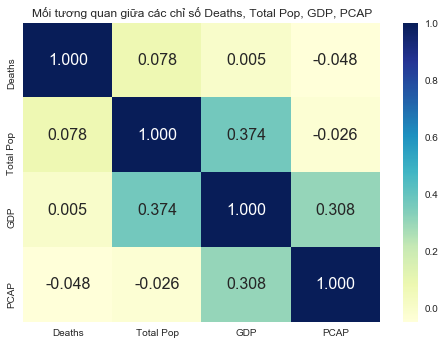

In [29]:
corr = grouped_deaths_by_country_and_year[['Deaths', 'Total Pop', 'GDP', 'PCAP']].corr()

ax = sns.heatmap(corr, annot=True, cmap="YlGnBu", fmt=".3f", annot_kws={'size':16}) \
        .set(title='Mối tương quan giữa các chỉ số Deaths, Total Pop, GDP, PCAP')

###### Nhận xét:

 - Chỉ số thương vọng (Deaths) không có ảnh hưởng nhiều đến các chỉ số khác như tổng dân số (Total Pop), tổng sản phẩm quốc nội (GDP), thu nhập bình quân đầu người (PCAP). Ngược lại với trực giác, ta thấy có vẻ số lượng người thương vong vẫn không ảnh hưởng mạnh đến sự phát triển dân số, kinh tế của các nước.
 
 - Có sự liên hệ không rõ ràng giữa các cặp chỉ số tổng dân số (Total Pop) - tổng sản phẩm quốc nội (GDP) và tổng sản phẩm quốc nội (GDP) - thu nhập bình quân đầu người (PCAP).
 
 - Có vẻ chỉ số tổng dân số (Total Pop), tổng sản phẩm quốc nội (GDP), thu nhập bình quân đầu người (PCAP) của các nước ít xảy ra thương vong quá lớn làm ảnh hưởng đến sự liên hệ giữa các chỉ số thương vọng (Deaths) với các chỉ số còn lại. Ta xét cụ thể sự ảnh hưởng của về chỉ số thương vọng (Deaths) so với các chỉ số còn lại trong top 10 nước có chỉ số thương vong (Deaths) cao nhất.

In [30]:
top_10_highest_deaths = df.groupby(['Country', 'Year', 'Total Pop', 'GDP', 'PCAP'])['Deaths'] \
                        .sum() \
                        .reset_index() \
                        .head(10)

top_10_highest_deaths

,Country,Year,Total Pop,GDP,PCAP,Deaths
0,Afghanistan,1980,13356511,3641723321.995460,272.655286,35000
1,Afghanistan,1981,13171673,3478787909.090910,264.111317,30000
2,Afghanistan,1982,12882528,4055179566.349810,179.426611,35500
3,Afghanistan,1983,12537730,4055179566.349810,179.426611,55012
4,Afghanistan,1984,12204292,4055179566.349810,179.426611,80001
5,Afghanistan,1985,11938208,4055179566.349810,179.426611,65029
6,Afghanistan,1986,11736179,4055179566.349810,179.426611,60000
7,Afghanistan,1987,11604534,4055179566.349810,179.426611,45070
8,Afghanistan,1988,11618005,4055179566.349810,179.426611,30128
9,Afghanistan,1989,11868877,4055179566.349810,179.426611,5528


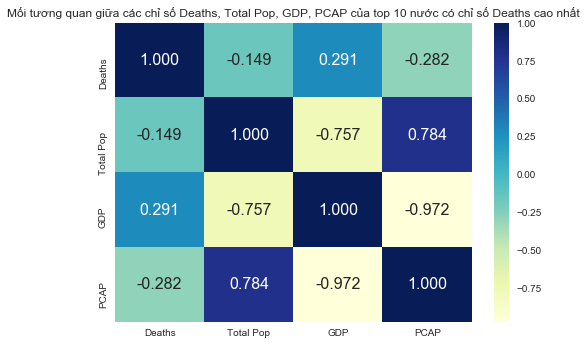

In [31]:
corr = top_10_highest_deaths[['Deaths', 'Total Pop', 'GDP', 'PCAP']].corr()

ax = sns.heatmap(corr, annot=True, cmap="YlGnBu", fmt=".3f", annot_kws={'size':16}) \
        .set(title='Mối tương quan giữa các chỉ số Deaths, Total Pop, GDP, PCAP của top 10 nước có chỉ số Deaths cao nhất')

###### Nhận xét:

 - Ta bắt đầu thấy rõ ràng hơn mối tương quan giữa các chỉ số này trong các nước có chỉ số thương vong (Deaths) cao.
   
 - Chỉ số thương vong (Deaths) có ảnh hưởng nhỏ tiêu cực đến tổng dân số (Total Pop), chỉ số thương vong (Deaths) có ảnh hưởng nhẹ tiêu cực đến thu nhập bình quân đầu người (PCAP). Hiển nhiên do việc xảy ra các sự kiện có thương vong cao cũng ít nhiều làm ảnh hưởng đến tình hình dân số, việc làm, thu nhập của nước.
 
 - Chỉ số thương vong (Deaths) có ảnh hưởng nhẹ tích cực đến tổng sản phẩm quốc nội (GDP). Điều này khá ngược với trực giác.


### Câu 3

In [32]:
vietnam_indicators = df[df['Country'] == 'Vietnam'].reset_index(drop=True)
vietnam_indicators

,Country,Year,Deaths,Cause,Total Pop,GDP,PCAP
0,Vietnam,1980,427,Epidemics,54281846,14094687820.744499,231.452328
1,Vietnam,1980,13,Conflict and Terrorism,54281846,14094687820.744499,231.452328
2,Vietnam,1980,0,Famine,54281846,14094687820.744499,231.452328
3,Vietnam,1980,402,Natural Disaster,54281846,14094687820.744499,231.452328
4,Vietnam,1980,0,Other Injuries,54281846,14094687820.744499,231.452328
...,...,...,...,...,...,...,...
185,Vietnam,2017,32,Epidemics,94596642,223779865815.183014,2365.621666
186,Vietnam,2017,0,Conflict and Terrorism,94596642,223779865815.183014,2365.621666
187,Vietnam,2017,0,Famine,94596642,223779865815.183014,2365.621666
188,Vietnam,2017,197,Natural Disaster,94596642,223779865815.183014,2365.621666


#### Tổng số thương vong của Việt Nam từ năm 1980 đến 2017

In [33]:
vietnam_deaths_indicator = vietnam_indicators.groupby(['Country'])['Deaths'].sum().reset_index()
vietnam_deaths_indicator

,Country,Deaths
0,Vietnam,19372


#### Tổng chỉ số thương vong của Việt Nam từ theo từng năm từ năm 1980 đến 2017

In [34]:
vietnam_deaths_indicator_by_year = vietnam_indicators[['Year', 'Deaths']].groupby(['Year'])['Deaths'].sum().reset_index()
vietnam_deaths_indicator_by_year

,Year,Deaths
0,1980,842
1,1981,289
2,1982,126
3,1983,817
4,1984,190
...,...,...
33,2013,254
34,2014,27
35,2015,59
36,2016,159


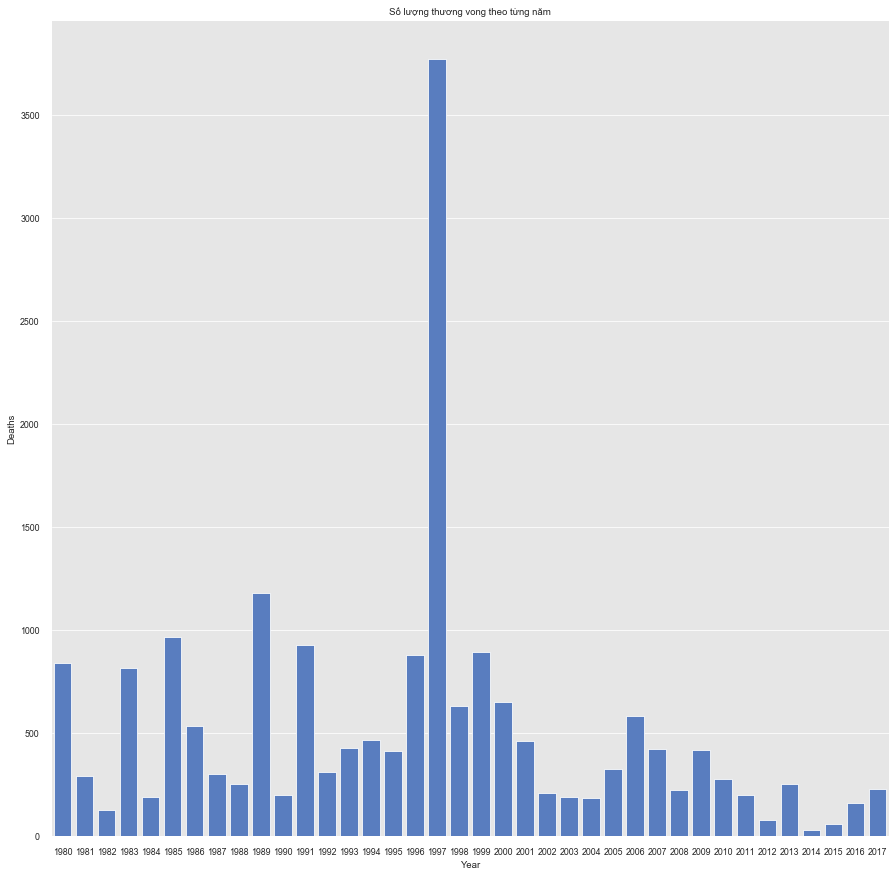

In [35]:
sns.set_style("darkgrid", {"axes.facecolor": ".9"})
sns.set_context("paper")

sns.set_color_codes("muted")
f, ax = plt.subplots(figsize=(15, 15))

sns.barplot(
    x="Year",
    y="Deaths",
    data=vietnam_deaths_indicator_by_year,
    label="Year",
    color='b').set(
    title='Số lượng thương vong theo từng năm'
)

sns.despine(left=True, bottom=True)

#### Phân loại chỉ số thương vong của Việt Nam từ theo từng năm từ năm 1980 đến 2017

In [36]:
vietnam_deaths_cause_indicators_by_year = vietnam_indicators[['Year', 'Deaths', 'Cause']]
vietnam_deaths_cause_indicators_by_year

,Year,Deaths,Cause
0,1980,427,Epidemics
1,1980,13,Conflict and Terrorism
2,1980,0,Famine
3,1980,402,Natural Disaster
4,1980,0,Other Injuries
...,...,...,...
185,2017,32,Epidemics
186,2017,0,Conflict and Terrorism
187,2017,0,Famine
188,2017,197,Natural Disaster


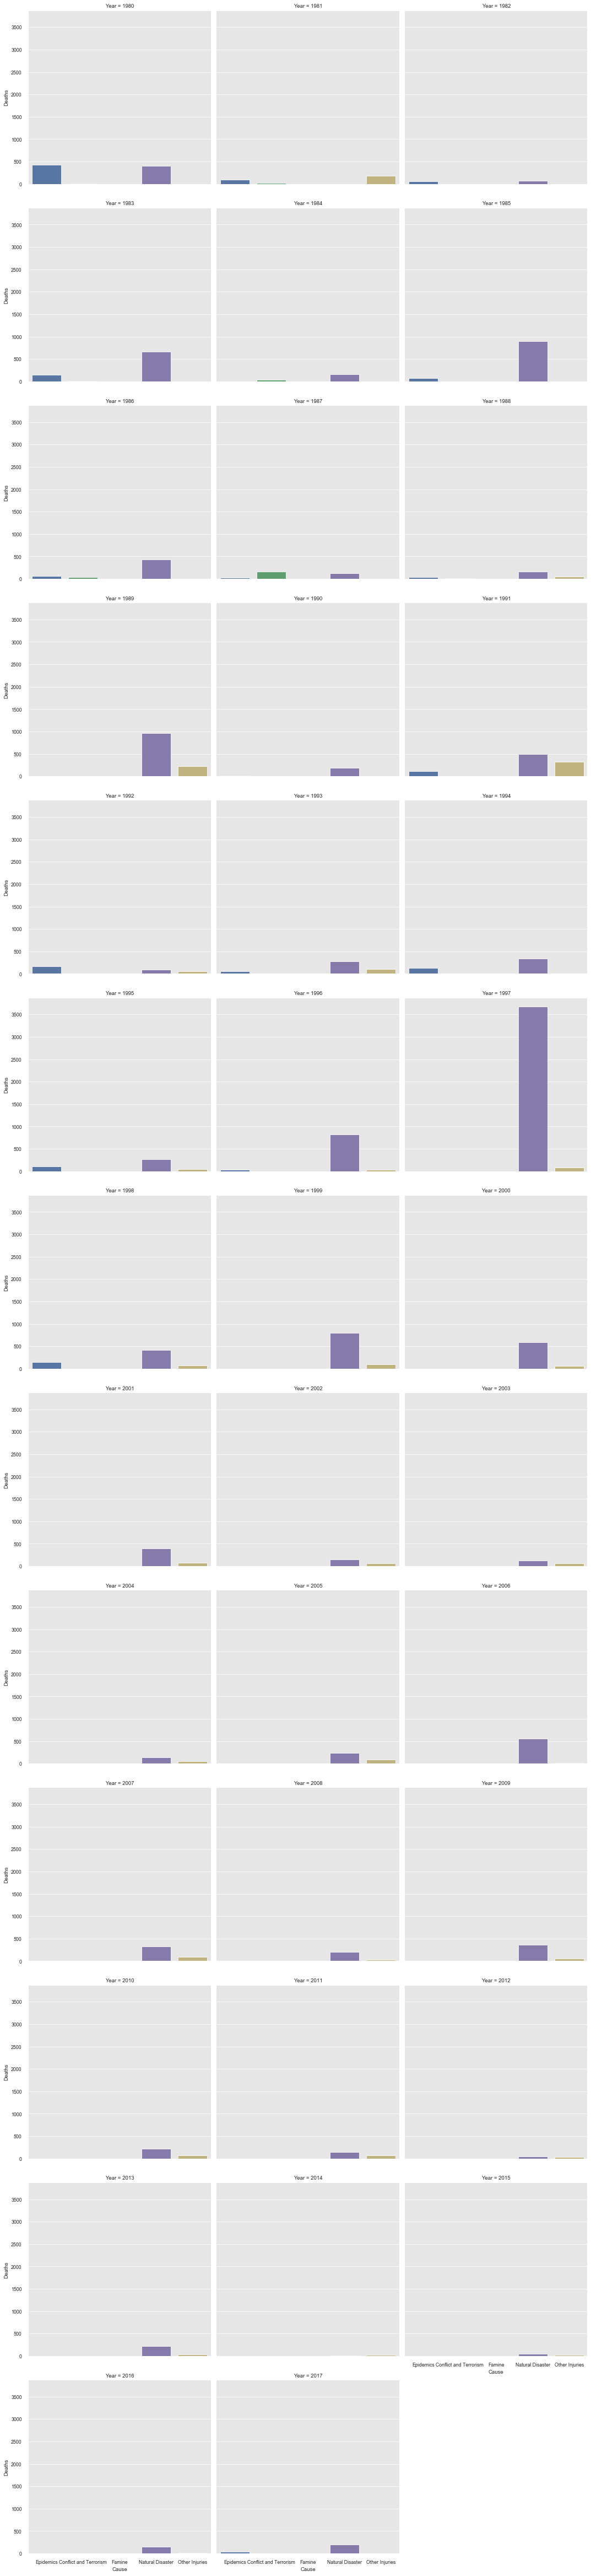

In [37]:
sns.set_style("darkgrid", {"axes.facecolor": ".9"})
sns.set_context("paper")

sns.set_color_codes("muted")

sns.catplot(
    x="Cause",
    y="Deaths",
    col="Year",
    col_wrap=3,
    data=vietnam_deaths_cause_indicators_by_year,
    kind="bar",
    height=5,
    legend=True, legend_out=False
)

sns.despine(left=True, bottom=True)

###### Nhận xét:

 - Chỉ số thương vong của Việt Nam cao bất thường vào năm 1997 (cao hơn rất nhiều so với các năm còn lại).
 
 - Chiếm đa số tỉ lệ thương vong vào năm 1997 là do thảm họa thiên nhiên. Điều này đúng với thực tế, vào 1/11/1997 [cơn bão nhiệt đới Linda](https://vi.wikipedia.org/wiki/B%C3%A3o_nhi%E1%BB%87t_%C4%91%E1%BB%9Bi_Linda_(1997)) được biết đến tại Việt Nam với tên gọi cơn bão số 5, cơn bão thảm khốc nhất khi tấn công vào miền Nam Việt Nam trong vòng ít nhất 100 năm. Gây nhiều thiệt hại về người và tài sản (số người thiệt mạng lên tới 3.111 người, tổng thiệt hại vật chất 385 triệu USD).
 
 - Cụ thể thương vong nhiều là do khu vực đổ bộ của bão là vào Nam Bộ - là khu vực hiếm khi gặp phải các cơn bão nhiệt đới nên người dân cũng như chính quyền địa phương còn mang tâm lí chủ quan và ít có kinh nghiệm đối phó.
 

#### Phân loại chỉ số thương vong của Việt Nam theo nguyên nhân

In [38]:
vietnam_deaths_indicator_by_cause = vietnam_indicators[['Cause', 'Deaths']] \
                                        .groupby(['Cause'])['Deaths'].sum() \
                                        .reset_index() \
                                        .sort_values(by=['Deaths'], ascending=False) \
                                        .reset_index(drop=True)
vietnam_deaths_indicator_by_cause

,Cause,Deaths
0,Natural Disaster,15281
1,Other Injuries,2104
2,Epidemics,1712
3,Conflict and Terrorism,275
4,Famine,0


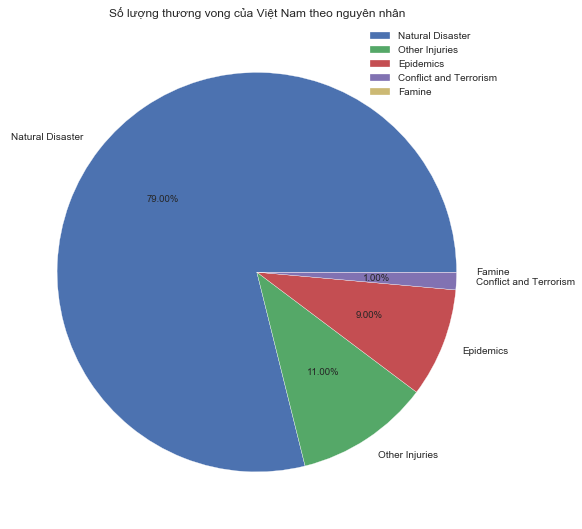

In [39]:
labels = vietnam_deaths_indicator_by_cause['Cause'].unique()
rates = (vietnam_deaths_indicator_by_cause['Deaths']/vietnam_deaths_indicator_by_cause['Deaths'].sum())*100

plt.style.use('seaborn')

fig, ax = plt.subplots()
plt.title('Số lượng thương vong của Việt Nam theo nguyên nhân')
plt.tight_layout()
fig.set_figheight(8)
fig.set_figwidth(8)

plt.pie(rates, labels=labels, radius=1, autopct=lambda p: '{:.2f}%'.format(round(p)) if p > 0 else '')
plt.legend()

plt.show()

###### Nhận xét:

 - Ta thấy phần lớn số lượng thương vong của Việt Nam đều là do thảm họa thiên nhiên (chiếm gần 80%). Điều này đúng với thực tế, do nước ta hằng năm đều chịu ảnh hưởng từ bão, lũ,... gây thiệt hại năng nề cả về người và tài sản nặng nề nhất là khu vực miền Trung.
 
 - Cần có những biện pháp ngăn chặn, giảm thiểu thiệt hại do các thảm họa thiên nhiên gây ra.
 
 - Phát hành sớm các cảnh báo về khí tượng một cách chính xác các nguy cơ do thảm họa thiên nhiên gây ra.
 
 - Rút kinh nghiệm về cơn bão nhiệt đới Linda vào năm 1997, phổ biến kinh nghiệm đối phó, đề phòng với bão, lũ cho mọi công dân.
 
 - Ngoài ra một số nguyên nhân khác vẫn chiếm 1 tỉ lệ đáng quan tâm như dịch bệnh (chiếm 8.84%) và xung đột (chiếm 1.42%), một vài nguyên nhân khác (chiếm 10.86%). Cũng cần phải có các biện pháp đối phó với những nguyên nhân này và ra biện pháp phòng chống, giảm thiểu các thiệt hại về người.
 
---

## Nhìn lại quá trình làm đồ án

#### Khó khăn gặp phải khi làm đồ án:

 - Cách đặt câu hỏi.
 
 - Cách chọn loại plot thích hợp để biểu thị dữ liệu.
 
 - Cách xử lý dữ liệu (mặc dù dữ liệu trên kaggle thuộc loại đã qua xử lý và làm sạch).
 
 - Cách viết báo cáo mô tả những gì đã làm.

#### Những điều học được khi làm đồ án:

 - Khả năng đọc tài liệu.
 
 - Khả năng google các từ khóa cho các vấn đề gặp phải.
 
 - Tìm kiếm nghiên cứu giải quyết các vấn đề khi gặp khó khăn.


---

## Nguồn tham khảo



Nguồn tham khảo kỹ thuật:

 - Documentation của thư viện Seaborn: [Seaborn](https://seaborn.pydata.org/)
 
 - Documentation của thư viện Matplotlib: [Matplotlib](https://matplotlib.org/contents.html)
 
 - Documentation của thư viện Pandas: [Pandas](https://pandas.pydata.org/docs/)
 
 - Trang Wikipedia giải thích về hệ số tương quan: [Wikipedia](https://vi.wikipedia.org/wiki/H%E1%BB%87_s%E1%BB%91_t%C6%B0%C6%A1ng_quan#:~:text=H%E1%BB%87%20s%E1%BB%91%20t%C6%B0%C6%A1ng%20quan%20l%C3%A0,k%C3%AA%20gi%E1%BB%AFa%20hai%20bi%E1%BA%BFn%20s%E1%BB%91.)
 
Nguồn tham khảo khác:

 - Trang Wikipedia bài viết về khu vực Trung Đông: [Wikipedia](https://vi.wikipedia.org/wiki/Trung_%C4%90%C3%B4ng)
 
 - Trang Wikipedia bài viết về Châu Phi: [Wikipedia](https://vi.wikipedia.org/wiki/Ch%C3%A2u_Phi)
 
 - Trang Wikipedia bài viết về Cơn bão nhiệt đới Lindav: [Wikipedia](https://vi.wikipedia.org/wiki/B%C3%A3o_nhi%E1%BB%87t_%C4%91%E1%BB%9Bi_Linda_(1997))